# Lead Score - Case Study
### Problem Statement
An X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
### Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company that your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it out based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

##### Importing Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

##### Importing Data

In [2]:
df= pd.read_csv("Leads.csv")

### Understanding The data

In [3]:
df.shape

(9240, 37)

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.dtypes.value_counts()

object     30
float64     4
int64       3
dtype: int64

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking for duplicates in the data

df=df.drop_duplicates(subset=['Prospect ID'])
df.shape

(9240, 37)

The dataset contains 9240 rows and 37 columns, of which majority are object type along with 7 numeric columns. The rows are unique as all the Prospect Id are unique.
Some columns have missing values, which will be dealt with in the coming section.
There are few Catagorical variables for which we need to create dummy variables while model building

### Data Cleaning & Preparation

##### Missing Values

In [9]:
x=df.isnull().sum()*100/df.shape[0]
x

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

There are a number of columns with missing values. These columns cannot be effectively used if the missing values are high. Therefore it is better to drop these. Hence, dropping the columns with more than 30% missing data points.

In [10]:
leads=df

In [11]:
for col in df.columns:
    if x[col]>30:
        leads.drop(columns=col, axis=1, inplace=True)

In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Since Prospect ID are all unique, we can drop the same as it won't be useful in the model building ahead. Similarly Lead Number doesn't help in adding any unique attribute. Dropping the columns

In [14]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

Some values are on 'Select' which means they were not selected by the visitor, hence replacing it with NaN

In [15]:
leads=leads.replace('Select', np.NaN)

In [16]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

###### Dealing with missing Values for Categorical Variables

In [17]:
# for Specialization
leads.Specialization.value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

About 36.6% leads have not mentioned their specialization, this can be due to many reasons such as the unavailability of the choice or in case the lead is a student. Therefore we can replace this NaN values with 'Not Specified'.

In [18]:
leads.Specialization=leads.Specialization.replace(np.NaN, 'Not Specified')

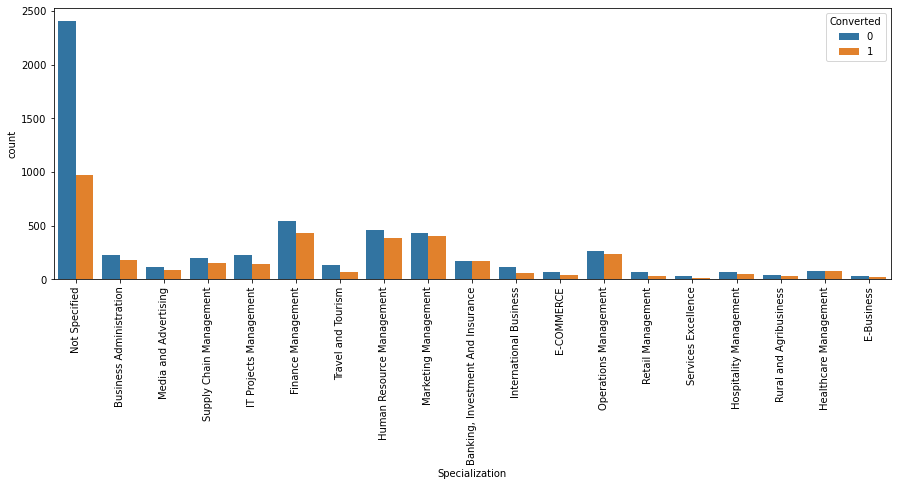

In [19]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

The Management specialization has majority of leads and also contains major number of converted leads, Therefore we can group the Management specializations under a single name in order to reduce the number of dummy variables ahead.

In [20]:
# combining Management specializations into one
leads['Specialization']=leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                        'IT Projects Management','Supply Chain Management',
                                                        'Healthcare Management','Hospitality Management',
                                                        'Retail Management'] ,'Management')

In [21]:
# for 'Country'

leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [22]:
# Checking value counts of "City" column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

For both columns "City" and "Country the majority of entries are for Mumbai and India respectively. Also, many of the entries are missing. It is better to drop these for further analysis

In [23]:
leads.drop(['Country', 'City'], axis=1, inplace=True)

In [24]:
# Current Occupation
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# replacing NaN values with "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [26]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since Majority of population has opted for a "Better career Prospect", It can be considered as the major reason and won't actually affect the model. Hence dropping the column

In [27]:
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [28]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Some corrections regarding the Case of letters and grouping the low frequency options together

In [29]:
#replacing NaN Values and combining values with less frequency
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

In [30]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [32]:
leads.isnull().sum()*100/leads.shape[0]

Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                0.000000
Specialization                               0.000000
How did you hear about X Education          78.463203
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [33]:
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
leads['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

These columns can be dropped as they do not serve helpful with more than 50% data as NaN

In [35]:
leads.drop(["Lead Profile","How did you hear about X Education"], axis=1, inplace=True)

In [36]:
leads.isnull().sum()*100/leads.shape[0]

Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

Dropping rows with null values.

In [37]:
leads = leads.dropna()

In [38]:
leads.isnull().sum()*100/leads.shape[0]

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [39]:
# Last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [40]:
# Grouping the lower frequency activities
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_activity')

In [41]:
# Lead origin
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [42]:
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [43]:
leads['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [44]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [45]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [46]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [47]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [48]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [49]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [50]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [51]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [52]:
leads['Get updates on DM Content'].value_counts(dropna=False)


No    9103
Name: Get updates on DM Content, dtype: int64

In [53]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [54]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

All the above coulmns have only 2 values, Yes and No, most of which are No. Therefore it is of no use to keep them for model building. Hence Dropping them

In [55]:
drop_col=(['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [56]:
leads.drop(columns=drop_col,axis=1,inplace=True)

In [57]:
leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [58]:
leads.shape

(9103, 11)

### Dealing with Numerical Columns

In [59]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


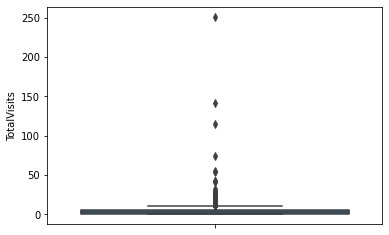

In [60]:
# Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

There is presence of outliers.capping the Maximum visits to 10, all the visits above 10 and above will be in the slab of 10 visits

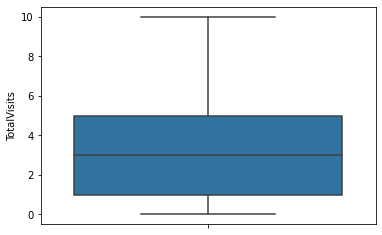

In [61]:
leads["TotalVisits"]= leads["TotalVisits"].apply(lambda x: 10 if x>10 else x)
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [62]:
leads.shape

(9103, 11)

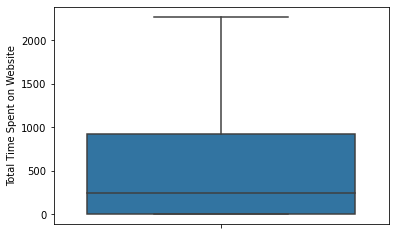

In [63]:
# total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

No Outliers in this column.

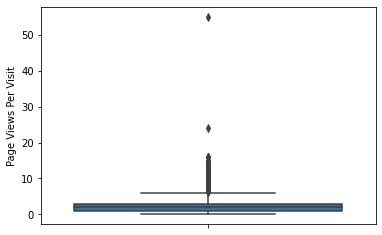

In [64]:
# Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


Outliers can be seen in this column. To deal with it removing top 1% outlier

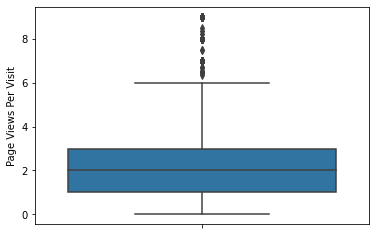

In [65]:
Q3=leads["Page Views Per Visit"].quantile(0.99)
leads=leads[leads["Page Views Per Visit"]<=Q3]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

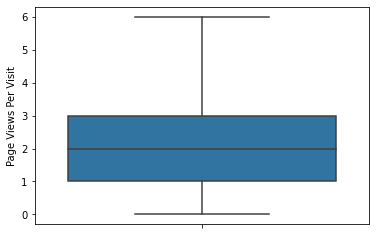

In [66]:
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].apply(lambda x: 6 if x>6 else x)
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [67]:
leads.shape

(9028, 11)

## Exploratory Data Analysis

### 2.1 Univariate Analysis

#### 2.1.1 Categorical Variables

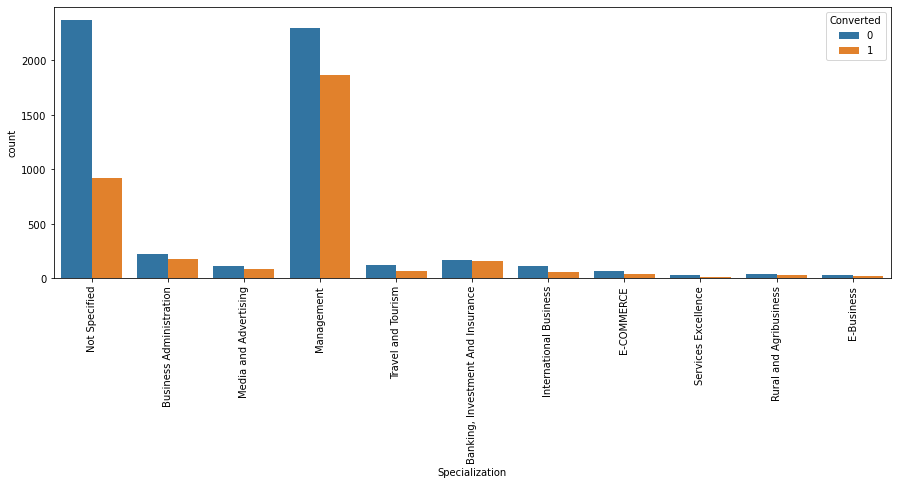

In [68]:
# Lead Specialization
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

People in the Mangement roles are highest in terms of conversion for courses, followed by Some with unspecified roles 'Mostly can be students'. Others with major potiential leads are Business administration and Banking people.

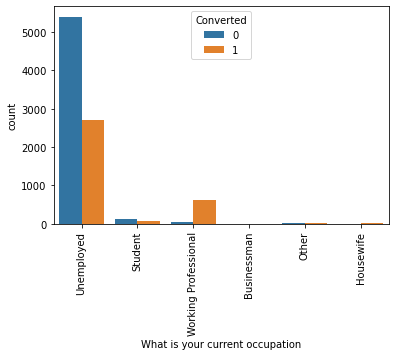

In [69]:
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Unemployed candidates are highest in terms of numbers
- Working professionals have bigher chances of going for the courses

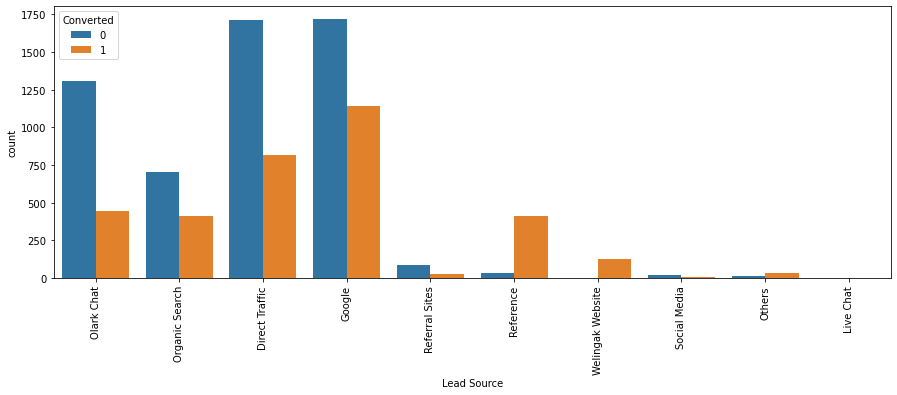

In [70]:
# Lead Source
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Maximum Number of leads are coming from Google and direct chat followed by Olark Chat and Organic Search
- Leads from Welingak Website have almost 100% conversion rate
- Refernces have a high number of conversion rate as well
- More focus should be given on conversion of candidates from major sources like google, direct traffic and Olark chat.

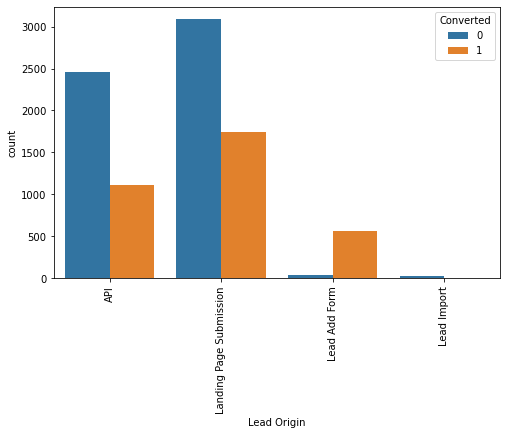

In [71]:
# Lead Origin
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Lead Add Form has high conversion rate but donot have a high number of leads
- API and Landing Page Submission have a about 50& of Leads, but the conversion can be improved
- Lead Import does'nt contribute much in the leads count

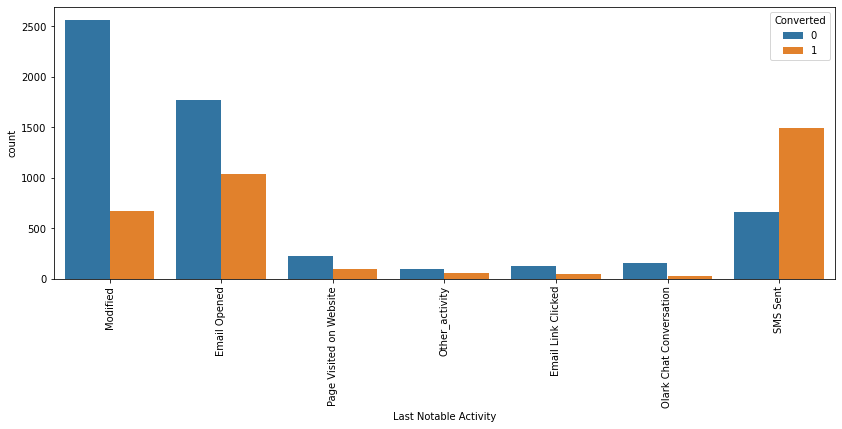

In [72]:
# Last Notable Activity
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

- Based on the numbers it can be seen that the SMS have a greter impact on conversion
- For other parameters the conversion is quite less as compared to the number of leads
- To improve the conversion a more intense approach or follow up activity need to be taken ahead

### 2.1.2 Numerical Attributes

In [73]:
leads.Converted.value_counts(normalize=True)

0    0.620292
1    0.379708
Name: Converted, dtype: float64

The current rate of conversion for leads is about 38%.

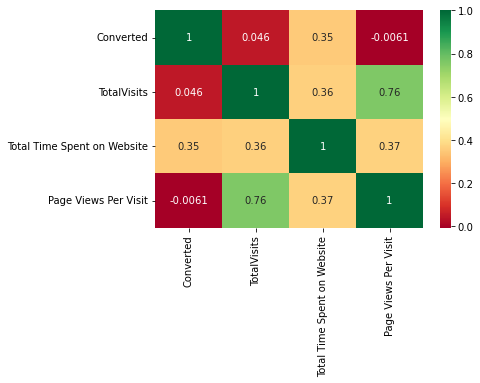

In [74]:
# Checking for Correlation amongst numerical variables
sns.heatmap(leads.corr(),cmap='RdYlGn', annot=True)
plt.show()

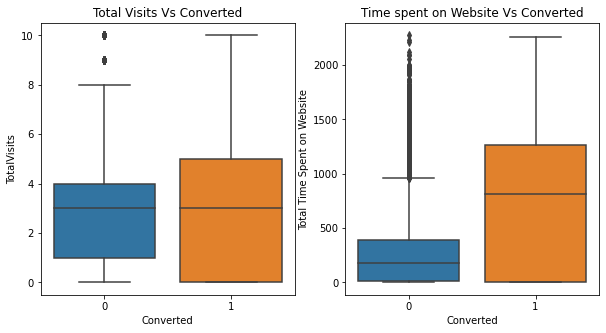

In [75]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.title('Total Visits Vs Converted')

plt.subplot(1,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.title('Time spent on Website Vs Converted')
plt.show()


- Median for Converted and non converted  leads are close, therefore nothing in particular can be predicted with the same
- Candidates who spent more time on the website are more likely to be getting enrolled
- An attractive website with engaging content can be a key feature for more traction towards enrollment

In [76]:
leads.shape

(9028, 11)

The Dataset is now ready and we can proceed ahead with Model creation. The data set has 9028 rows and 11 columns. Next we can go ahead with creation of dummy variables for the set of categorical variables

## Dummy Variables

In [77]:
cols=leads.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Amongst the above columns 'A free copy of mastering The Interview' is a 'Yes', 'No' Variable. Hence mapping it to 0 and 1
1: Yes and 0: No

In [78]:
def map(x):
    return x.map({'Yes':1,'No':0})
leads_final=leads
leads_final['A free copy of Mastering The Interview']=map(leads['A free copy of Mastering The Interview'])

In [79]:
leads_final['A free copy of Mastering The Interview'].value_counts()

0    6184
1    2844
Name: A free copy of Mastering The Interview, dtype: int64

Getting dummies for categorical columns and adding to master dataframe. Dropping the column for which dummies are created

In [80]:
dummy = pd.get_dummies(leads_final[['Lead Origin','What is your current occupation']], drop_first=True)

leads_final = pd.concat([leads_final,dummy],1)

In [81]:
dummy = pd.get_dummies(leads_final['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [82]:
dummy = pd.get_dummies(leads_final['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [83]:
dummy = pd.get_dummies(leads_final['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [84]:
dummy = pd.get_dummies(leads_final['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [85]:
dummy = pd.get_dummies(leads_final['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_activity'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [86]:
# dropping the original columns
leads_final.drop(cols,1,inplace = True)

In [87]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train-Test Split & Logistic Regression Model

In [88]:
y = leads_final['Converted']

y.head()

X=leads_final.drop('Converted', axis=1)

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6319 entries, 5736 to 5780
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6319 non-null   float64
 1   Total Time Spent on Website                           6319 non-null   int64  
 2   Page Views Per Visit                                  6319 non-null   float64
 3   Lead Origin_Landing Page Submission                   6319 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6319 non-null   uint8  
 5   Lead Origin_Lead Import                               6319 non-null   uint8  
 6   What is your current occupation_Housewife             6319 non-null   uint8  
 7   What is your current occupation_Other                 6319 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling Data

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5736,1.0,0.415446,0.541667,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9064,0.4,0.537062,0.221667,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7757,0.7,0.012428,0.388333,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9119,0.2,0.337772,0.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2433,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Model Development

In [92]:
import statsmodels.api as sm

We will be using RFE and choosing top 15 variables for output

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)     
rfe = rfe.fit(X_train, y_train)

In [94]:
# Selected RFE features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 27),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 14),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_Olark Chat', False, 34),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 4),
 ('Specialization_Business Adm

In [95]:
col= X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_Google', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites'

#### Defining VIF function

In [97]:
def vif_cal(df):
    vif=pd.DataFrame()
    x=df
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return (vif)

### Model 1:

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.4
Date:                Mon, 11 Jul 2022   Deviance:                       5286.7
Time:                        23:28:31   Pearson chi2:                 6.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2377      0.085    -14.570      0.000      -1.404      -1.071
TotalVisits                                              0.6684      0.168      3.981      0.000       0.339       0.997
Total Time Spent on Website                              4.6332      0.166     27.898      0.000       4.308       4.959
Lead Origin_Lead Add Form                                2.6544      0.223     11.901      0.000       2.217       3.092
What is your current occupation_Housewife               23.1791   1.54e+04      0.002      0.999   -3.01e+04    3.01e+04
What is your current occupation_Working Professional     2.8464      0.196     14.542      0.000       2.463       3.230
Lead Source_Direct Traffic                              -0.8130      0.065    -12.473      0.000      -0.941      -0.685
Lead Source_Direct Traffic                              -0.8130      0.065    -12.473      0.000      -0.941      -0.685
Lead Source_Organic Search                              -0.7556      0.080     -9.482      0.000      -0.912      -0.599
Lead Source_Organic Search                              -0.7556      0.080     -9.482      0.000      -0.912      -0.599
Lead Source_Referral Sites                              -0.8422      0.176     -4.786      0.000      -1.187      -0.497
Lead Source_Referral Sites                              -0.8422      0.176     -4.786      0.000      -1.187      -0.497
Lead Source_Welingak Website                             0.6736      0.258      2.610      0.009       0.168       1.179
Lead Source_Welingak Website                             0.6736      0.258      2.610      0.009       0.168       1.179
Lead Source_Google                                      -0.6404      0.064    -10.057      0.000      -0.765      -0.516
Lead Source_Google                                      -0.6404      0.064    -10.057      0.000      -0.765      -0.516
Lead Source_Welingak Website                             0.6736      0.258      2.610      0.009       0.168       1.179
Lead Source_Welingak Website                             0.6736      0.258      2.610      0.009       0.168       1.179
Last Activity_Converted to Lead                         -1.0484      0.218     -4.810      0.000      -1.476      -0.621
Last Activity_Email Bounced                             -1.8363      0.322     -5.696      0.000      -2.468      -1.204
Last Activity_Olark Chat Conversation                   -1.4713      0.159     -9.254      0.000      -1.783      -1.160
Last Notable Activity_SMS Sent                           1.5194      0.080     18.964      0.000       1.362       1.676
==========================================================

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Source_Referral Sites,inf
12,Lead Source_Welingak Website,inf
16,Lead Source_Welingak Website,inf
15,Lead Source_Welingak Website,inf
14,Lead Source_Google,inf
5,Lead Source_Direct Traffic,inf
6,Lead Source_Direct Traffic,inf
7,Lead Source_Organic Search,inf
8,Lead Source_Organic Search,inf
9,Lead Source_Referral Sites,inf


There is a high correlation between few variables, dropping some of them and checking the VIF.

In [101]:
col=col.drop(["Lead Source_Referral Sites","Lead Source_Organic Search"],1)

#### Model 2:

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.3
Date:                Mon, 11 Jul 2022   Deviance:                       5386.7
Time:                        23:28:32   Pearson chi2:                 6.27e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6206      0.080    -20.300      0.000      -1.777      -1.464
TotalVisits                                             -0.2168      0.141     -1.539      0.124      -0.493       0.059
Total Time Spent on Website                              4.2411      0.158     26.891      0.000       3.932       4.550
Lead Origin_Lead Add Form                                3.0498      0.220     13.879      0.000       2.619       3.481
What is your current occupation_Housewife               59.7465   2.54e+07   2.36e-06      1.000   -4.97e+07    4.97e+07
What is your current occupation_Working Professional     2.7927      0.194     14.404      0.000       2.413       3.173
Lead Source_Direct Traffic                              -0.3718      0.128     -2.913      0.004      -0.622      -0.122
Lead Source_Direct Traffic                              -0.3718      0.128     -2.913      0.004      -0.622      -0.122
Lead Source_Welingak Website                             0.6771      0.258      2.621      0.009       0.171       1.183
Lead Source_Welingak Website                             0.6771      0.287      2.360      0.018       0.115       1.239
Lead Source_Google                                      -0.1936      0.089     -2.169      0.030      -0.369      -0.019
Lead Source_Google                                      -0.1936      0.089     -2.169      0.030      -0.369      -0.019
Lead Source_Welingak Website                             0.6771      0.265      2.553      0.011       0.157       1.197
Lead Source_Welingak Website                             0.6771      0.265      2.553      0.011       0.157       1.197
Last Activity_Converted to Lead                         -1.3722      0.212     -6.485      0.000      -1.787      -0.957
Last Activity_Email Bounced                             -1.9916      0.320     -6.220      0.000      -2.619      -1.364
Last Activity_Olark Chat Conversation                   -1.2561      0.157     -8.021      0.000      -1.563      -0.949
Last Notable Activity_SMS Sent                           1.4743      0.079     18.688      0.000       1.320       1.629
========================================================================================================================
"""

In [103]:
vif_cal(X_train[col])

,Features,VIF
8,Lead Source_Welingak Website,inf
9,Lead Source_Google,inf
12,Lead Source_Welingak Website,inf
11,Lead Source_Welingak Website,inf
10,Lead Source_Google,inf
5,Lead Source_Direct Traffic,inf
6,Lead Source_Direct Traffic,inf
7,Lead Source_Welingak Website,inf
0,TotalVisits,2.55
1,Total Time Spent on Website,2.23


In [104]:
col1=col
col1=col1.drop(["Lead Source_Google","Lead Source_Direct Traffic","Lead Source_Welingak Website"],1)

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.1
Date:                Mon, 11 Jul 2022   Deviance:                       5468.3
Time:                        23:28:32   Pearson chi2:                 6.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8894      0.073    -25.948      0.000      -2.032      -1.747
TotalVisits                                             -0.3269      0.140     -2.330      0.020      -0.602      -0.052
Total Time Spent on Website                              3.9884      0.150     26.559      0.000       3.694       4.283
Lead Origin_Lead Add Form                                3.7008      0.209     17.681      0.000       3.291       4.111
What is your current occupation_Housewife               22.7564   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Working Professional     2.7607      0.193     14.280      0.000       2.382       3.140
Last Activity_Converted to Lead                         -1.4101      0.210     -6.727      0.000      -1.821      -0.999
Last Activity_Email Bounced                             -1.9650      0.309     -6.357      0.000      -2.571      -1.359
Last Activity_Olark Chat Conversation                   -1.0737      0.155     -6.944      0.000      -1.377      -0.771
Last Notable Activity_SMS Sent                           1.4603      0.078     18.700      0.000       1.307       1.613
========================================================================================================================
"""

In [106]:
vif_cal(X_train[col1])

,Features,VIF
1,Total Time Spent on Website,2.02
0,TotalVisits,1.94
8,Last Notable Activity_SMS Sent,1.33
4,What is your current occupation_Working Profes...,1.15
2,Lead Origin_Lead Add Form,1.12
5,Last Activity_Converted to Lead,1.02
6,Last Activity_Email Bounced,1.02
7,Last Activity_Olark Chat Conversation,1.02
3,What is your current occupation_Housewife,1.00


### Model 4

The model has p value of ""What is your current occupation_Housewife" above 0.05 and hence is not significant. Therefore dropping it for next model

In [109]:
col1=col1.drop(["What is your current occupation_Housewife"],1)

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.0
Date:                Mon, 11 Jul 2022   Deviance:                       5478.1
Time:                        23:59:23   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8831      0.073    -25.903      0.000      -2.026      -1.741
TotalVisits                                             -0.3316      0.140     -2.365      0.018      -0.606      -0.057
Total Time Spent on Website                              3.9895      0.150     26.583      0.000       3.695       4.284
Lead Origin_Lead Add Form                                3.7117      0.209     17.749      0.000       3.302       4.122
What is your current occupation_Working Professional     2.7573      0.193     14.262      0.000       2.378       3.136
Last Activity_Converted to Lead                         -1.4155      0.210     -6.754      0.000      -1.826      -1.005
Last Activity_Email Bounced                             -1.9706      0.309     -6.375      0.000      -2.577      -1.365
Last Activity_Olark Chat Conversation                   -1.0792      0.155     -6.981      0.000      -1.382      -0.776
Last Notable Activity_SMS Sent                           1.4552      0.078     18.644      0.000       1.302       1.608
========================================================================================================================
"""

In [112]:
vif_cal(X_train[col1])

,Features,VIF
1,Total Time Spent on Website,2.02
0,TotalVisits,1.94
7,Last Notable Activity_SMS Sent,1.33
3,What is your current occupation_Working Profes...,1.15
2,Lead Origin_Lead Add Form,1.12
4,Last Activity_Converted to Lead,1.02
5,Last Activity_Email Bounced,1.02
6,Last Activity_Olark Chat Conversation,1.02


The VIF is now in feasible range, also the P values are in acceptable range indicating towards a significant model. Now moving ahead with Predicted values on train set

In [113]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5736    0.364188
9064    0.531679
7757    0.112484
9119    0.353915
2433    0.132031
1832    0.154794
1157    0.917937
265     0.049159
1526    0.148479
2037    0.081701
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36418782, 0.53167919, 0.11248353, 0.35391478, 0.13203146,
       0.15479362, 0.91793683, 0.04915873, 0.14847906, 0.0817007 ])

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.364188,5736
1,1,0.531679,9064
2,0,0.112484,7757
3,0,0.353915,9119
4,0,0.132031,2433


In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.364188,5736,0
1,1,0.531679,9064,1
2,0,0.112484,7757,0
3,0,0.353915,9119,0
4,0,0.132031,2433,0


In [117]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3474  455]
 [ 848 1542]]


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7937964867858839


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity of Model

In [120]:
TP / float(TP+FN)

0.6451882845188285

##### Specificity of Model

In [121]:
TN / float(TN+FP)

0.8841944515143803

###### False Positive Rate

In [122]:
print(FP/ float(TN+FP))

0.11580554848561975


##### Predicted Positive Value

In [123]:
print (TP / float(TP+FP))

0.7721582373560341


##### Negative predicted Value

In [124]:
print (TN / float(TN+ FN))

0.8037945395650162


### ROC Curve

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

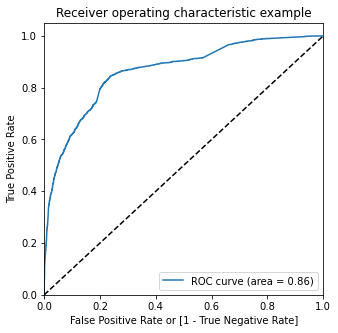

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


##### The ROC curve area should be near to 1, it indicates the predictive power of the model. We are getting 0.86 as the area, which indicates a good Predictive Value.

##### Optimal Cutoff Point

In [129]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.364188,5736,0,1,1,1,1,0,0,0,0,0,0
1,1,0.531679,9064,1,1,1,1,1,1,1,0,0,0,0
2,0,0.112484,7757,0,1,1,0,0,0,0,0,0,0,0
3,0,0.353915,9119,0,1,1,1,1,0,0,0,0,0,0
4,0,0.132031,2433,0,1,1,0,0,0,0,0,0,0,0


In [130]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378224  1.000000  0.000000
0.1   0.1  0.528248  0.984100  0.250954
0.2   0.2  0.750119  0.875314  0.673963
0.3   0.3  0.793638  0.843096  0.763553
0.4   0.4  0.787625  0.742678  0.814966
0.5   0.5  0.793796  0.645188  0.884194
0.6   0.6  0.789207  0.561088  0.927971
0.7   0.7  0.777813  0.485774  0.955459
0.8   0.8  0.755658  0.397490  0.973530
0.9   0.9  0.704542  0.233891  0.990837


Plotting a Curve to understand the accuracy, specificity and Sensititvity for different probability values

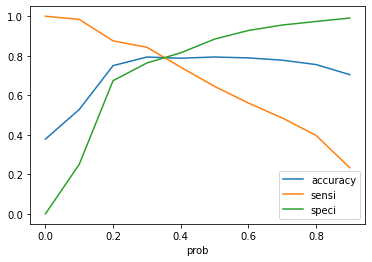

In [131]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above curve 0.37 seems to be the optimal point. Considering 0.37 as the cutoff probability.

In [132]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.364188,5736,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.531679,9064,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.112484,7757,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.353915,9119,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.132031,2433,0,1,1,0,0,0,0,0,0,0,0,0


In [133]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.364188,5736,0,36
1,1,0.531679,9064,1,53
2,0,0.112484,7757,0,11
3,0,0.353915,9119,0,35
4,0,0.132031,2433,0,13


##### Accuracy

In [134]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7982275676531096

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3096,  833],
       [ 442, 1948]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity

In [138]:
TP / float(TP+FN)

0.8150627615062761

###### Specificity

In [139]:
TN / float(TN+FP)

0.7879867650801731

###### False Positive Rate

In [140]:
print(FP/ float(TN+FP))

0.21201323491982693


###### Positive predictive value

In [141]:
print (TP / float(TP+FP))

0.7004674577490112


##### Negative Predictive value

In [142]:
print (TN / float(TN+ FN))

0.8750706613906162


##### Confusion Matrix

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3096,  833],
       [ 442, 1948]], dtype=int64)

#### Precision

In [144]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7004674577490112

##### Recall

In [145]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8150627615062761

In [146]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7004674577490112

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8150627615062761

#### Final Observations

The model seems to be a well performing model with ROC value of 0.86, which is quite good. For the train Data we have
- Accuracy: 79.83%
- Sensitivity: 81.55%
- Specificity: 78.8%

### Precision Recall Curve

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

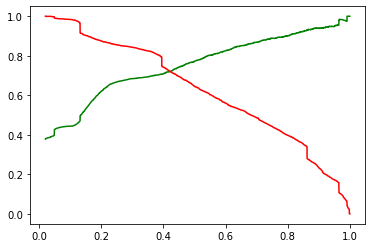

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Scaling test set

In [151]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4696,0.3,0.201144,0.500000,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5424,0.4,0.301496,0.666667,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1629,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2148,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9182,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [152]:
X_test = X_test[col1]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
4696,0.3,0.201144,0,0,0,0,0,1
5424,0.4,0.301496,0,0,0,0,0,0
1629,0.0,0.000000,0,0,0,0,0,0
2148,0.0,0.000000,0,0,0,0,0,0
9182,0.0,0.000000,0,0,0,0,0,0


In [153]:
X_test_sm = sm.add_constant(X_test)

In [154]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4696    0.568352
5424    0.307271
1629    0.132031
2148    0.132031
9182    0.132031
1081    0.147284
554     0.173690
459     0.886100
3764    0.317790
4285    0.917915
dtype: float64

In [155]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_test_df = pd.DataFrame(y_test)

In [157]:
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing indices from dataframes to append them together
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4696,0.568352
1,0,5424,0.307271
2,0,1629,0.132031
3,0,2148,0.132031
4,0,9182,0.132031


In [161]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [162]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [163]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4696,0,0.568352,57
1,5424,0,0.307271,31
2,1629,0,0.132031,13
3,2148,0,0.132031,13
4,9182,0,0.132031,13


In [164]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [165]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4696,0,0.568352,57,1
1,5424,0,0.307271,31,0
2,1629,0,0.132031,13,0
3,2148,0,0.132031,13,0
4,9182,0,0.132031,13,0


##### Accuracy Overall

In [166]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7925433739387228

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1309,  362],
       [ 200,  838]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity

In [169]:
TP / float(TP+FN)

0.8073217726396917

##### Specificity

In [170]:
TN / float(TN+FP)

0.7833632555356074

###### Precision Score

In [171]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6983333333333334

###### Recall Score

In [172]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8073217726396917

##### Observation on Test Data

- Accuracy: 79.3%
- Sesititvity: 80.8%
- Specificity: 78.34%

#### Comparision Between Train & Test data

 #### Train Data  vs  Test Data

 Accuracy:                           79.83%                 vs                                   79.3

 Sensitivity:                        81.55%                 vs                                  80.8%
 
 Specificity:                        78.8%                   vs                                 78.34%

Overall The Model seems to predict a Good Conversion Rate and therefore can be used ahead for narrowing the choices for leads and imroving the enrollments